In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preliminary Data Analysis

### Loading the datasets.

In [52]:
# 2021 Dataset

df_21 = pd.read_csv('dataset/PHL-PSA-FIES-2021-PUF/FIES PUF 2021 Vol.1.csv')

# 2023 Dataset

df_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

C:\Users\Chy\AppData\Local\Temp\ipykernel_1532\1626076420.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


### Data Cleaning

In [53]:
df_21.columns

Index(['W_REGN', 'W_PROV', 'SEQUENCE_NO', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'TOINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL',
       'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA',
       'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL',
       'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS',
       'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD',
       'CLOTH', 'FURNISHING', 'HEALTH', 'HOUSING_WATER', 'ACTRENT', 'RENTVAL',
       'IMPUTED_RENT', 'BIMPUTED_RENT', 'TRANSPORT', 'COMMUNICATION',
       'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE',
       'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBU

In [54]:
df_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [55]:
# Since there are discrepancies between the 2021 and 2023 dataset. We will follow the better described columns between the two datasets.
# For example, the SEQUENCE_NO in the 2021 dataset is described as "Sequence No." while in the 2023 dataset it is described as "Household ID"

df_21.rename(columns={'SEQUENCE_NO': 'SEQ_NO'}, inplace=True)

In [56]:
# Since `BWEIGHT` does not exist in the 2023 dataset, we will drop it from the 2021 dataset to retain consistency.

df_21.drop(columns=['BWEIGHT'], inplace=True)

In [57]:
df_21.rename(columns={'RFACT': 'FAMILY_WEIGHT'}, inplace=True)
df_23.rename(columns={'RFACT': 'FAMILY_WEIGHT'}, inplace=True)

In [58]:
df_21.rename(columns={'RFACT_POP': 'POPULATION_WEIGHT'}, inplace=True)
df_23.rename(columns={'MEM_RFACT': 'POPULATION_WEIGHT'}, inplace=True)

In [59]:
df_23.rename(columns={'PERCAPITA': 'PCINC'}, inplace=True)
df_23.drop(columns=['PPCINC'], inplace=True)
df_23.rename(columns={'PRPCINC': 'PPCINC'}, inplace=True)

In [60]:
df_23.drop(columns=['RPCINC'], inplace=True)
df_23.rename(columns={'RPCINC_NIR': 'RPCINC'}, inplace=True)

In [61]:
df_23.drop(columns=['W_REGN'], inplace=True)
df_23.rename(columns={'W_REGN_NIR': 'W_REGN'}, inplace=True)

In [62]:
df_21.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'FSIZE', 'REG_SAL', 'SEASON_SAL', 'WAGES',
       'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
       'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT',
       'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG',
       'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'EAINC',
       'TOINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'FURNISHING', 'HEALTH',
       'HOUSING_WATER', 'ACTRENT', 'RENTVAL', 'IMPUTED_RENT', 'BIMPUTED_RENT',
       'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE',
       'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE',
       'OTHER_DISBURSEME

In [63]:
df_23.columns

Index(['W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL', 'WAGES',
       'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
       'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT',
       'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG',
       'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'EAINC',
       'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG',
       'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER',
       'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG',
       'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME',
       'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER', 'ACTRENT',
       'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING', 'HEALTH',
       'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE',
       'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE',
       'OTHER_DISBURSEMENT', 'FOOD

In [69]:
df_23.shape[1]

87

In [68]:
df_21.shape[1]

87

In [70]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQ_NO                        165029 non-null  int64  
 3   FSIZE                         165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

### Checking for missing values

In [76]:
# Result should be 17 since there are 17 regions in the Philippines
df_21["W_REGN"].nunique()

17

In [75]:
# Result should be 82 since there are 82 provinces in the Philippines. 38 in Luzon, 27 in the Visayas and 17 in Mindanao.

df_21["W_PROV"].nunique()

87

## Preliminary Findings (Summary Statistics)

### Statistics about the `FSIZE` (Family Size)

In [77]:
# Statistics about `FSIZE`
df_21['FSIZE'].describe()

count    165029.000000
mean          4.244409
std           2.029229
min           1.000000
25%           3.000000
50%           4.000000
75%           5.500000
max          23.000000
Name: FSIZE, dtype: float64

### Statistics about the `REG_SAL` (Regular Salary)

In [79]:
# Statistics about `REG_SAL`

df_21['REG_SAL'].describe()

count    1.650290e+05
mean     1.253006e+05
std      2.053604e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.600000e+04
75%      1.654000e+05
max      6.821000e+06
Name: REG_SAL, dtype: float64

### Statistics about `PCINC` (Per Capita Income)

In [80]:
# Statistics about `PCINC`
df_21['PCINC'].describe()

count    1.650290e+05
mean     8.185092e+04
std      1.010066e+05
min      5.408625e+03
25%      3.540300e+04
50%      5.543200e+04
75%      9.400000e+04
max      9.691285e+06
Name: PCINC, dtype: float64

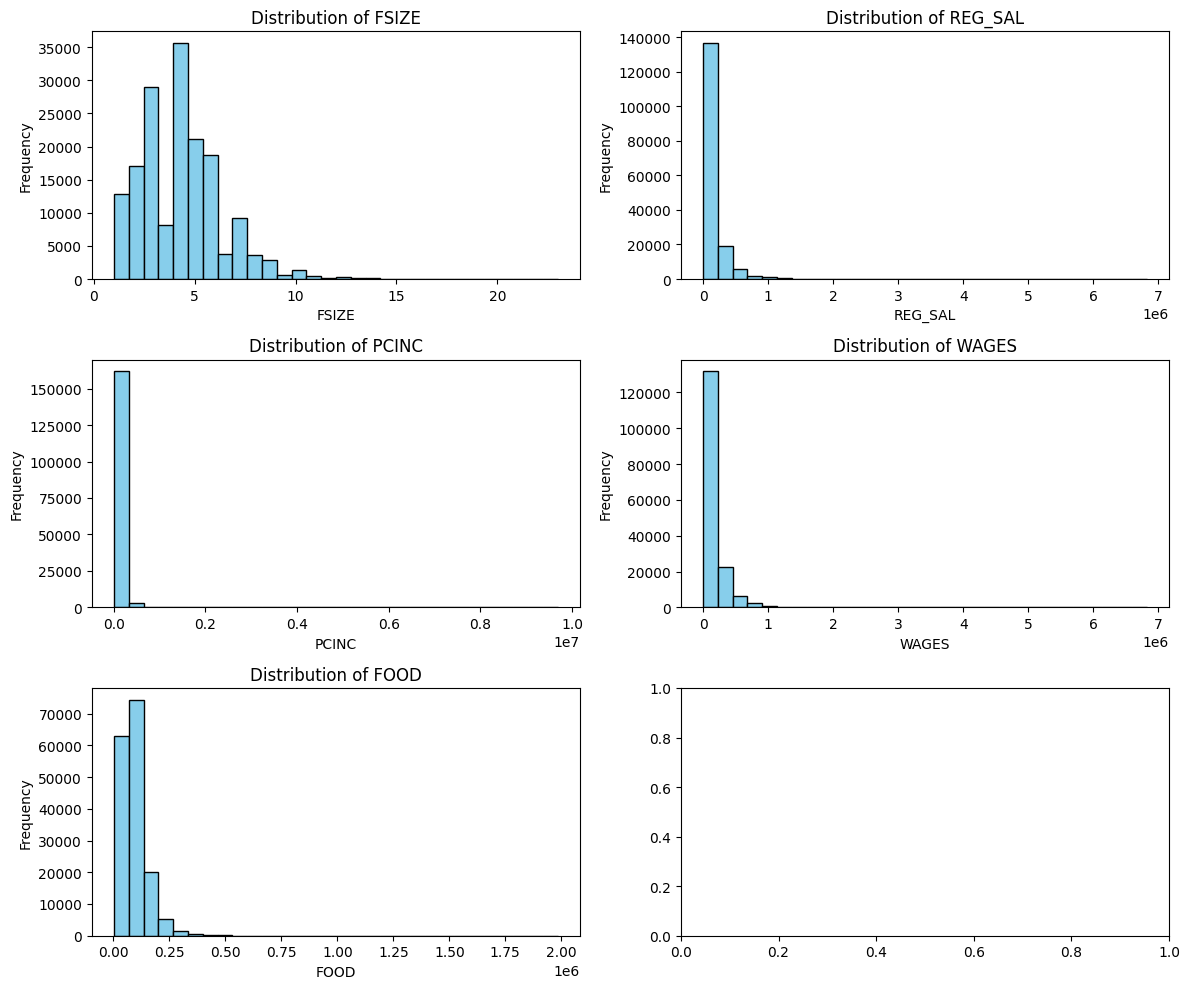

In [81]:
columns_to_plot = ['FSIZE', 'REG_SAL', 'PCINC', 'WAGES', 'FOOD']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Loop through the selected columns and plot
for i, col in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    ax.hist(df_21[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()